In [2]:
from os import listdir
from os.path import isfile, join
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import seaborn as sn

txtpath = "scratch_cc"
onlyfiles = [f for f in listdir(txtpath) if isfile(join(txtpath, f))]
#allandsingbandfiles = [f for f in onlyfiles if "all_and_sing" in f]
#allbandfiles = [f for f in allandsingbandfiles if "all_band" in f]
#allc1files = [f for f in allbandfiles if "mu_obs_len" in f]
#print(allbandfiles)

In [3]:
data = pd.DataFrame()
pd.set_option('display.max_rows', None)
col_allband = ["band", "fits", "object", "Tau", "V", "Num_Obs", "Mu_Bright"] #maybe add coordinates from fits.

for f in onlyfiles:
    tmp = pd.read_csv(txtpath+'/'+f, names=col_allband, skiprows=1, delimiter="\t")
    #print(tmp)

    data = pd.concat([data,tmp],axis=0)
data = data.sort_values(by=['fits', 'object'])

print(data.shape)
#print(data)
data.to_csv("all_and_sing_df_all.csv")

(224661, 7)


In [3]:
full_data = pd.read_csv("all_and_sing_df_all_RA_DEC_ID.csv")
full_data.head(10)

,Unnamed: 0,band,fits,object,COADD_OBJECT_ID,RA,Dec,Tau,V,Num_Obs,Mu_Bright
0,0,All,C1,23,1398942991,53.816479,-28.087091,1.344104,-2.080653,390,18.742426
1,0,z,C1,23,1398942991,53.816479,-28.087091,0.897972,-2.319796,178,17.269523
2,0,All,C1,92,1398942810,53.945625,-28.083435,1.398423,-1.911252,227,20.106253
3,0,i,C1,92,1398942810,53.945625,-28.083435,1.148313,-1.241843,11,19.291334
4,0,All,C1,112,1398942896,54.011875,-28.082512,3.408844,-0.760919,112,23.908417
5,0,g,C1,112,1398942896,54.011875,-28.082512,3.999284,-2.613931,10,24.475279
6,0,All,C1,138,1398942609,53.882717,-28.081196,3.983408,-2.997880,699,19.835594
7,0,z,C1,138,1398942609,53.882717,-28.081196,0.000031,-2.148228,290,18.826763
8,0,All,C1,144,1404633536,54.570648,-28.080921,1.637854,-2.845116,697,17.835774
9,0,z,C1,144,1404633536,54.570648,-28.080921,0.000028,-1.638124,282,17.173931


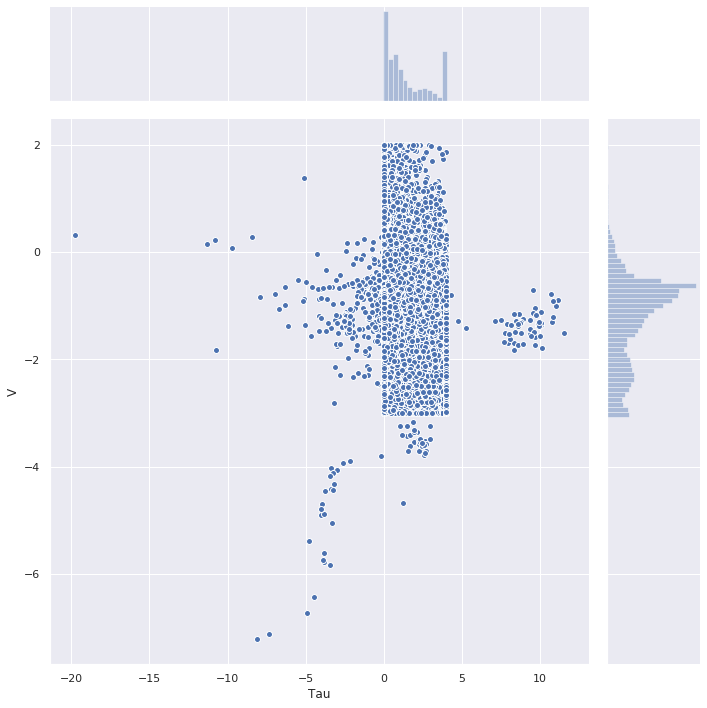

In [16]:

sn.jointplot(x="Tau", y="V", data=full_data, edgecolor="white", marginal_kws=dict(bins=100), height=10)

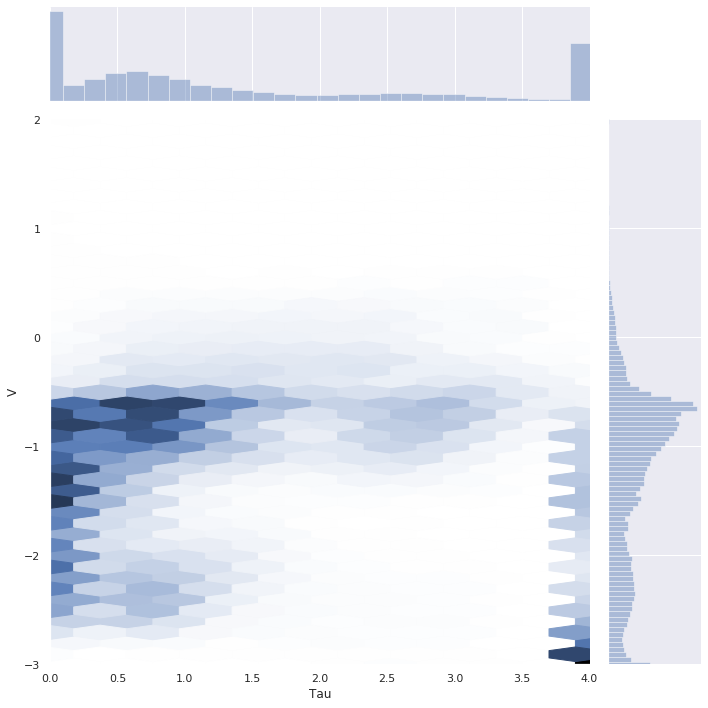

In [28]:
g = sn.jointplot(x="Tau", y="V", data=full_data, kind="hex",
                 xlim=(0,4), ylim=(-3,2), marginal_kws=dict(bins=200),
                 height=10, joint_kws=dict(gridsize=80))
#g.ax_marg_x.set_xlim(0, 4)
#g.ax_marg_y.set_ylim(-3, 2)

In [ ]:
g = sn.jointplot(x="Tau", y="V", data=full_data, edgecolor="white",
                 xlim=(0,4), ylim=(-3,2), marginal_kws=dict(bins=200),
                 height=10, kind="kde")